Precision/Recall Curve for Overall Users_Evaluating Artist Recommendation System

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import csv
import numpy as np
import h5py
from scipy import sparse
import matplotlib.pyplot as plt


UAM_MATLAB_FILE = "LFM-1b_LEs.mat"         # Matlab .mat file where the listening events are stored
ARTISTS_FILE = "LFM-1b_artists.txt"        # artist names for UAM
USERS_FILE = "output_data_new.txt"            # user names for UAM
K=3


# Read the user-artist-matrix and corresponding artist and user indices from Matlab file
def read_UAM(m_file, user_data_file):
    mf = h5py.File(m_file, 'r')
    user_ids = np.array(mf.get('idx_users')).astype(np.int64)[ :47587]
    artist_ids = np.array(mf.get('idx_artists')).astype(np.int64)


    # Load UAM
    UAM = sparse.csr_matrix((mf['/LEs/']['data'][()],
                             mf['/LEs/']['ir'][()],
                             mf['/LEs/']['jc'][()])).transpose()

    # Read gender information from user data file and take both female & male data
    user_data = np.loadtxt(user_data_file, dtype=np.str)  # Assuming user data file is a text file with each row representing a user's data
    gender_ids = np.isin(user_data[:, 3], ['f', 'm']).astype(np.int64)  # Include both female and male users

    # Filter users based on gender (both female and male)
    both_user_ids = user_ids[gender_ids == 1][ :47587]
    user_indices = np.where(np.isin(user_ids, both_user_ids))[0]
    artist_indices = np.where(np.isin(artist_ids, artist_ids))[0]
    UAM = UAM[user_indices][:, artist_indices]

    # user and artist indices to access UAM
    UAM_user_idx = UAM.indices
    UAM_artist_idx = UAM.indptr
    return UAM, UAM_user_idx, UAM_artist_idx, both_user_ids, artist_ids


# Function to read metadata (users or artists)
def read_from_file(filename, col):                  # col = column to read from file
    data = []
    with open(filename, 'r') as f:                  # open file for reading
        reader = csv.reader(f, delimiter='\t')      # create reader
        headers = next(reader)                     # skip header
        for row in reader:
            item = row[col]
            data.append(item)
    f.close()
    return data


Define a function to compute Precision and Recall:

In [ ]:
def calculate_precision_recall(recommended_artists_idx, ground_truth_artists_idx):
    # Convert the indices to sets for easier comparison
    recommended_set = set(recommended_artists_idx)
    ground_truth_set = set(ground_truth_artists_idx)

    # Calculate precision and recall
    precision = len(recommended_set.intersection(ground_truth_set)) / len(recommended_set)
    recall = len(recommended_set.intersection(ground_truth_set)) / len(ground_truth_set)

    return precision, recall

Modify the main program to perform Ten-fold cross-validation and plot Precision/Recall:

<ipython-input-16-b2695264158b>:30: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  user_data = np.loadtxt(user_data_file, dtype=np.str)  # Assuming user data file is a text file with each row representing a user's data


Streaming output truncated to the last 5000 lines.
Seed user-id:1045824
Seed user-id:15662290
Seed user-id:5397050
Seed user-id:38101503
Seed user-id:4763716
Seed user-id:27435800
Seed user-id:27437152
Seed user-id:21992993
Seed user-id:8140204
Seed user-id:16051654
Seed user-id:4623402
Seed user-id:10241493
Seed user-id:21680657
Seed user-id:41092502
Seed user-id:15401176
Seed user-id:13353181
Seed user-id:7130397
Seed user-id:38351660
Seed user-id:5985211
Seed user-id:48610358
Seed user-id:7088267
Seed user-id:3753893
Seed user-id:31365192
Fold: 4
Seed user-id:32095794
Seed user-id:46867929
Seed user-id:5397050
Seed user-id:45880219
Seed user-id:3439387
Seed user-id:48610358
Seed user-id:49644001
Seed user-id:5235333
Seed user-id:12123509
Seed user-id:15822761
Seed user-id:21888421
Seed user-id:8999848
Seed user-id:31935762
Seed user-id:2702849
Seed user-id:4455838
Seed user-id:32412598
Seed user-id:10031292
Seed user-id:48390586
Seed user-id:48680476
Seed user-id:8995777
Seed user-i

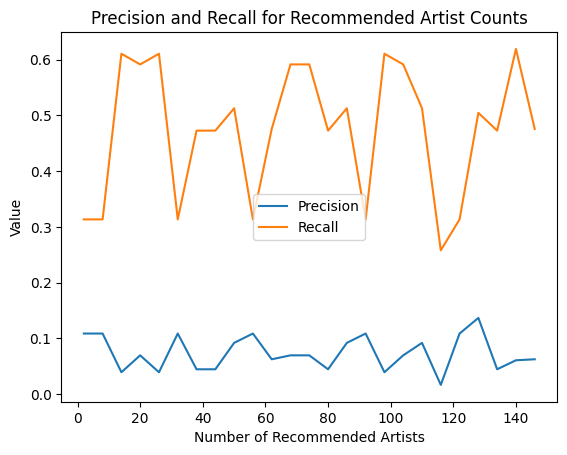

In [ ]:
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # Initialize variables
    artists = []            # artists
    users = []              # users

    # Read UAM
    UAM, UAM_user_idx, UAM_artist_idx, both_user_ids, artist_ids = read_UAM(UAM_MATLAB_FILE, USERS_FILE)
    # UAM, UAM_user_idx, UAM_artist_idx, user_ids, artist_ids = read_UAM(UAM_MATLAB_FILE)
    print('Users: ', len(both_user_ids))
    print('Artists: ', len(artist_ids))


    # Load metadata from provided files into lists
    artists = read_from_file(ARTISTS_FILE, 1)
    users = read_from_file(USERS_FILE, 0)

    # Randomly select a subset of 500 users
    random_subset_users = np.random.choice(len(both_user_ids), size=500, replace=False)

    # Perform 10-fold cross-validation
    kf = KFold(n_splits=10, shuffle=True)

    precision_values = []
    recall_values = []

    for recommended_count in range(2, 149, 6):
        fold_precision_values = []
        fold_recall_values = []


        for fold, (train_indices, test_indices) in enumerate(kf.split(random_subset_users)):
            print("Fold:", fold + 1)

            # Split the random subset into training and test sets
            train_users = random_subset_users[train_indices]
            test_users = random_subset_users[test_indices]

            # Perform train and test split for the current fold
            train_user_ids, test_user_ids = train_test_split(train_users, test_size=0.1, random_state=42)


            for u in test_user_ids:
                print("Seed user-id:" + str(users[u]))

                # Get (normalized) playcount vector for current user u
                pc_vec = UAM.getrow(u)

                # Compute similarities as dot product between playcount vector of user and all users via UAM
                uU_sim = pc_vec.dot(UAM.transpose()).tocoo()
                uU_user_idx = uU_sim.col
                uU_data = uU_sim.data

                # Determine nearest neighbors to seed based on uUM

                # Find the occurrence of the seed user in uU_data cols
                # and set to 0 so that it is not selected as its own NN
                occ_user_idx = (uU_user_idx == u)
                uU_data[occ_user_idx] = 0

                # Eliminate zeros
                uU_sim.data = uU_data
                uU_sim = uU_sim.tocsr()
                uU_sim.eliminate_zeros()
                uU_sim = uU_sim.tocoo()
                uU_user_idx = uU_sim.col
                uU_data = uU_sim.data

        # Sort users according to the similarity (uU_data)
        sort_index = np.argsort(uU_data)

        # Select the K nearest neighbors among all users
        # Note that uU_user_idx indeed provides the indices for users in UAM
        recommended_user_idx = uU_user_idx[sort_index[-K:]]
        # Get user_ids corresponding to nearest neighbors
        recommended_user_ids = both_user_ids[recommended_user_idx]
        # Get similarity score for nearest neighbors
        recommended_user_scores = uU_data[sort_index[-K:]]

        print ("Nearest K=" + str(K) + " neighbors\' user-ids: ", recommended_user_ids.flatten())
        print ("Scores/similarities:" + str(recommended_user_scores))
        print ("Index in UAM for recommended user-ids:" + str(recommended_user_idx))

        #
        # Determine set of recommended artists
        recommended_artists_idx = []  # Initialize as empty list

        for u_idx in recommended_user_idx:
            recommended_artists_idx.extend(list(UAM.getrow(u_idx).indices))

        # Convert to set to remove duplicates and sort it
        recommended_artists_idx = sorted(set(recommended_artists_idx))

        # Get the ground truth artists for the seed user
        ground_truth_artists_idx = pc_vec.indices

        # Calculate precision and recall for the current seed user
        precision, recall = calculate_precision_recall(recommended_artists_idx, ground_truth_artists_idx)
        print("Precision:", precision)
        print("Recall:", recall)

        # Store the precision and recall values for plotting
        fold_precision_values.append(precision)
        fold_recall_values.append(recall)

        # Calculate average precision and recall for the current recommended_count
        avg_precision = sum(fold_precision_values) / len(fold_precision_values)
        avg_recall = sum(fold_recall_values) / len(fold_recall_values)

        precision_values.append(avg_precision)
        recall_values.append(avg_recall)

    # Generate the range of recommended artist counts
    recommended_counts = list(range(2, 149, 6))

    # Ensure that precision_values and recall_values have the same first dimension
    precision_values = precision_values[:len(recommended_counts)]
    recall_values = recall_values[:len(recommended_counts)]

    # Plot precision and recall
    plt.plot(recommended_counts, precision_values, label='Precision')
    plt.plot(recommended_counts, recall_values, label='Recall')

    # Set plot labels and title
    plt.xlabel('Number of Recommended Artists')
    plt.ylabel('Value')
    plt.title('Precision and Recall for Recommended Artist Counts')

    # Set plot legend
    plt.legend()

    # Show the plot
    plt.show()

